## Question 1 
## -Deeksha Dave

In [83]:
## importing all libraries required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder

In [2]:
## importing the csv file
data = pd.read_csv('C:\\Users\\Dell_Owner\\Desktop\\MIO Partners Case\\vehicles.csv', header = None)

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
1,15.69571429,0,0,0,19,0,0,0,0,0,...,NaN,NaN,0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,29.96454545,0,0,0,9,0,0,0,0,0,...,NaN,NaN,0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,12.20777778,0,0,0,23,0,0,0,0,0,...,NaN,NaN,0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,29.96454545,0,0,0,10,0,0,0,0,0,...,NaN,NaN,0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [4]:
#finding shape of the dataset
data.shape

(40692, 83)

In [5]:
## rearranging data to set the 0th row as the cloumn header
data.columns = data.iloc[0]

In [6]:
## deleting 0th row of data
new_data = data.iloc[1:]

## Question 1 part 1. Finding most fuel effcient fleet of cars

In [7]:
## selecting important values to view
values = new_data[['city08','cityA08','comb08','combA08','displ','feScore','fuelType1','fuelType2','highway08','highwayA08','model','make','trany','phevCity','phevHwy','phevComb']]

In [8]:
## fuel efficiency for gasoline type fuel only
df_fuel = values[['city08', 'highway08', 'comb08', 'fuelType1','make']]
df_gasoline = df_fuel[(df_fuel['fuelType1'].str.contains(
                                                    'Gasoline'))].copy(deep=True)

In [9]:
# Changing the data type of columns to numeric int values
df_gasoline['comb08'] = pd.to_numeric(df_gasoline['comb08'], errors='coerce')
df_gasoline['city08'] = pd.to_numeric(df_gasoline['city08'], errors='coerce')
df_gasoline['highway08'] = pd.to_numeric(df_gasoline['highway08'], errors='coerce')

In [10]:
#drop unnecessary columns
df_gasoline.drop(['fuelType1'], axis=1, inplace=True, errors='ignore')

In [11]:
#groupby make so that we get the most effcieint make (for all their fleet of cars)
res_gasoline = df_gasoline.groupby('make').mean()

In [12]:
res_gasoline

,city08,highway08,comb08
make,,,
AM General,15.166667,15.000000,14.833333
ASC Incorporated,14.000000,21.000000,16.000000
Acura,19.172107,26.139466,21.721068
Alfa Romeo,18.306452,25.403226,20.903226
American Motors Corporation,16.296296,20.481481,17.888889
Aston Martin,11.569536,17.397351,13.543046
Audi,17.626168,25.107996,20.331256
Aurora Cars Ltd,12.000000,20.000000,15.000000
Autokraft Limited,14.000000,20.500000,16.500000


## For Gasoline: Smart produces overall most efficient cars

In [79]:
## most fuel effcient make for gasoline cars overall combined
res_gasoline.nlargest(1,'comb08')

,city08,highway08,comb08
make,,,
smart,33.090909,39.090909,35.590909


In [14]:
# most fuel effcient make for gasoline cars in city
res_gasoline.nlargest(1,'city08')

,city08,highway08,comb08
make,,,
smart,33.090909,39.090909,35.590909


In [15]:
# most fuel effcient make for gasoline cars on highway
res_gasoline.nlargest(1,'highway08')

,city08,highway08,comb08
make,,,
smart,33.090909,39.090909,35.590909


In [16]:
## to calculate overall make and model most efficient car with all fuel types
fuel_economy = values[['comb08','city08','highway08','make','model']]

In [17]:
fuel_economy['comb08'] = pd.to_numeric(fuel_economy['comb08'], errors='coerce')
fuel_economy['city08'] = pd.to_numeric(fuel_economy['city08'], errors='coerce')
fuel_economy['highway08'] = pd.to_numeric(fuel_economy['highway08'], errors='coerce')

In [18]:
fuel_economy

,comb08,city08,highway08,make,model
1,21,19,25,Alfa Romeo,Spider Veloce 2000
2,11,9,14,Ferrari,Testarossa
3,27,23,33,Dodge,Charger
4,11,10,12,Dodge,B150/B250 Wagon 2WD
5,19,17,23,Subaru,Legacy AWD Turbo
6,22,21,24,Subaru,Loyale
7,25,22,29,Subaru,Loyale
8,24,23,26,Toyota,Corolla
9,26,23,31,Toyota,Corolla
10,25,23,30,Toyota,Corolla


## Overall: Hyundai Ioniq Electric is most Fuel effcient make/model

In [80]:
## most fuel effcient make/model overall cars for combination
fuel_economy.nlargest(1,'comb08')

,comb08,city08,highway08,make,model
31243,136,150,122,Hyundai,Ioniq Electric


In [81]:
## most fuel effcient make/model overall cars in city
fuel_economy.nlargest(1,'city08')

,comb08,city08,highway08,make,model
31243,136,150,122,Hyundai,Ioniq Electric


In [82]:
## most fuel effcient make/model overall cars on highway
fuel_economy.nlargest(1,'highway08')

,comb08,city08,highway08,make,model
32802,130,136,123,Tesla,Model 3 Long Range


In [24]:
type(fuel_economy)

pandas.core.frame.DataFrame

In [25]:
new_values = values[['make','comb08','city08','highway08','trany']]

In [26]:
## converting the data type in column to string
new_values['trany'].astype(str)

1           Manual 5-spd
2           Manual 5-spd
3           Manual 5-spd
4        Automatic 3-spd
5           Manual 5-spd
6        Automatic 3-spd
7           Manual 5-spd
8        Automatic 3-spd
9           Manual 5-spd
10       Automatic 4-spd
11          Manual 5-spd
12       Automatic 4-spd
13          Manual 5-spd
14       Automatic 4-spd
15       Automatic 3-spd
16          Manual 5-spd
17       Automatic 4-spd
18          Manual 5-spd
19       Automatic 4-spd
20          Manual 5-spd
21       Automatic 5-spd
22       Automatic 5-spd
23       Automatic 4-spd
24       Automatic 3-spd
25       Automatic 3-spd
26          Manual 4-spd
27       Automatic 4-spd
28       Automatic 3-spd
29       Automatic 4-spd
30       Automatic 4-spd
              ...       
40662       Manual 5-spd
40663    Automatic 3-spd
40664       Manual 5-spd
40665    Automatic 4-spd
40666       Manual 5-spd
40667    Automatic 3-spd
40668    Automatic 3-spd
40669       Manual 5-spd
40670       Manual 4-spd


In [27]:
#extract only manual/auto from trany
# M is manual, A is automatic. Since we only need either manual or automatic
new_values['trany'] = new_values['trany'].str[0]

In [28]:
## converting data type to numeric
new_values['comb08'] = pd.to_numeric(new_values['comb08'], errors='coerce')
new_values['city08'] = pd.to_numeric(new_values['city08'], errors='coerce')
new_values['highway08'] = pd.to_numeric(new_values['highway08'], errors='coerce')

In [29]:
#groupyby make and trany
grouped_df = new_values.groupby(['make','trany']).mean()

In [30]:
grouped_df

0                                          comb08     city08  highway08
make                             trany                                 
AM General                       A      14.833333  15.166667  15.000000
ASC Incorporated                 A      16.000000  14.000000  21.000000
Acura                            A      21.687500  19.108333  26.170833
                                 M      21.804124  19.329897  26.061856
Alfa Romeo                       A      22.064516  19.483871  26.451613
                                 M      19.741935  17.129032  24.354839
American Motors Corporation      A      17.000000  15.555556  19.111111
                                 M      18.333333  16.666667  21.166667
Aston Martin                     A      14.000000  12.031915  17.904255
                                 M      12.789474  10.807018  16.561404
Audi                             A      20.875536  18.151645  25.693848
                                 M      19.562500  16.822917  24.343750
Aurora Cars Ltd                  M      15.000000  12.000000  20.000000
Autokraft Limited                M      16.500000  14.000000  20.500000
Avanti Motor Corporation         A      16.500000  14.500000  21.000000
Azure Dynamics                   A      62.000000  62.000000  62.000000
BMW                              A      21.246321  18.584043  26.043377
                                 M      19.775410  16.922951  25.111475
BMW Alpina                       A      15.666667  13.666667  20.333333
BYD                              A      67.333333  66.833333  67.833333
Bentley                          A      13.338583  10.984252  17.700787
Bertone                          M      22.000000  20.000000  26.000000
Bill Dovell Motor Car Company    A      17.500000  17.000000  18.500000
Bitter Gmbh and Co. Kg           A      14.000000  12.500000  16.500000
                                 M      15.333333  13.333333  19.000000
Bugatti                          A      10.200000   8.200000  14.500000
Buick                            A      20.636964  17.773927  25.755776
                                 M      24.000000  20.793103  29.793103
CCC Engineering                  A      15.000000  13.000000  20.000000
CODA Automotive                  A      73.000000  77.000000  68.000000
...                                           ...        ...        ...
Spyker                           A      17.000000  14.000000  21.000000
                                 M      15.000000  13.000000  18.000000
Sterling                         A      17.833333  15.833333  20.500000
                                 M      18.500000  16.666667  21.833333
Subaru                           A      22.276824  20.120172  25.761803
                                 M      22.896635  20.497596  26.867788
Superior Coaches Div E.p. Dutton A      10.000000  10.000000  11.000000
Suzuki                           A      22.521236  20.644788  25.648649
                                 M      24.191406  22.250000  27.359375
TVR Engineering Ltd              A      18.000000  15.000000  22.000000
                                 M      18.000000  15.000000  22.000000
Tecstar, LP                      A      13.000000  11.000000  15.000000
Tesla                            A      96.741379  95.086207  98.965517
Texas Coach Company              A      12.000000  11.000000  14.000000
Toyota                           A      22.153561  20.319733  25.123145
                                 M      22.381636  20.271162  25.771879
VPG                              A      14.200000  12.200000  17.200000
Vector                           A       8.000000   7.000000  10.000000
                                 M       9.000000   7.500000  12.000000
Vixen Motor Company              M      16.000000  15.000000  16.000000
Volga Associated Automobile      M      19.000000  18.000000  22.000000
Volkswagen                       A      23.928458  21.338633  28.386328
                                 M      

In [31]:
## data for finding maximum fuel economy for the make for all fuel type
data_2 = new_values[['make','comb08','city08','highway08']]

In [32]:
## average mpg for each make
res = data_2.groupby('make').mean()

In [33]:
res

,comb08,city08,highway08
make,,,
AM General,14.833333,15.166667,15.000000
ASC Incorporated,16.000000,14.000000,21.000000
Acura,21.721068,19.172107,26.139466
Alfa Romeo,20.903226,18.306452,25.403226
American Motors Corporation,17.888889,16.296296,20.481481
Aston Martin,13.543046,11.569536,17.397351
Audi,20.492401,17.763931,25.299899
Aurora Cars Ltd,15.000000,12.000000,20.000000
Autokraft Limited,16.500000,14.000000,20.500000


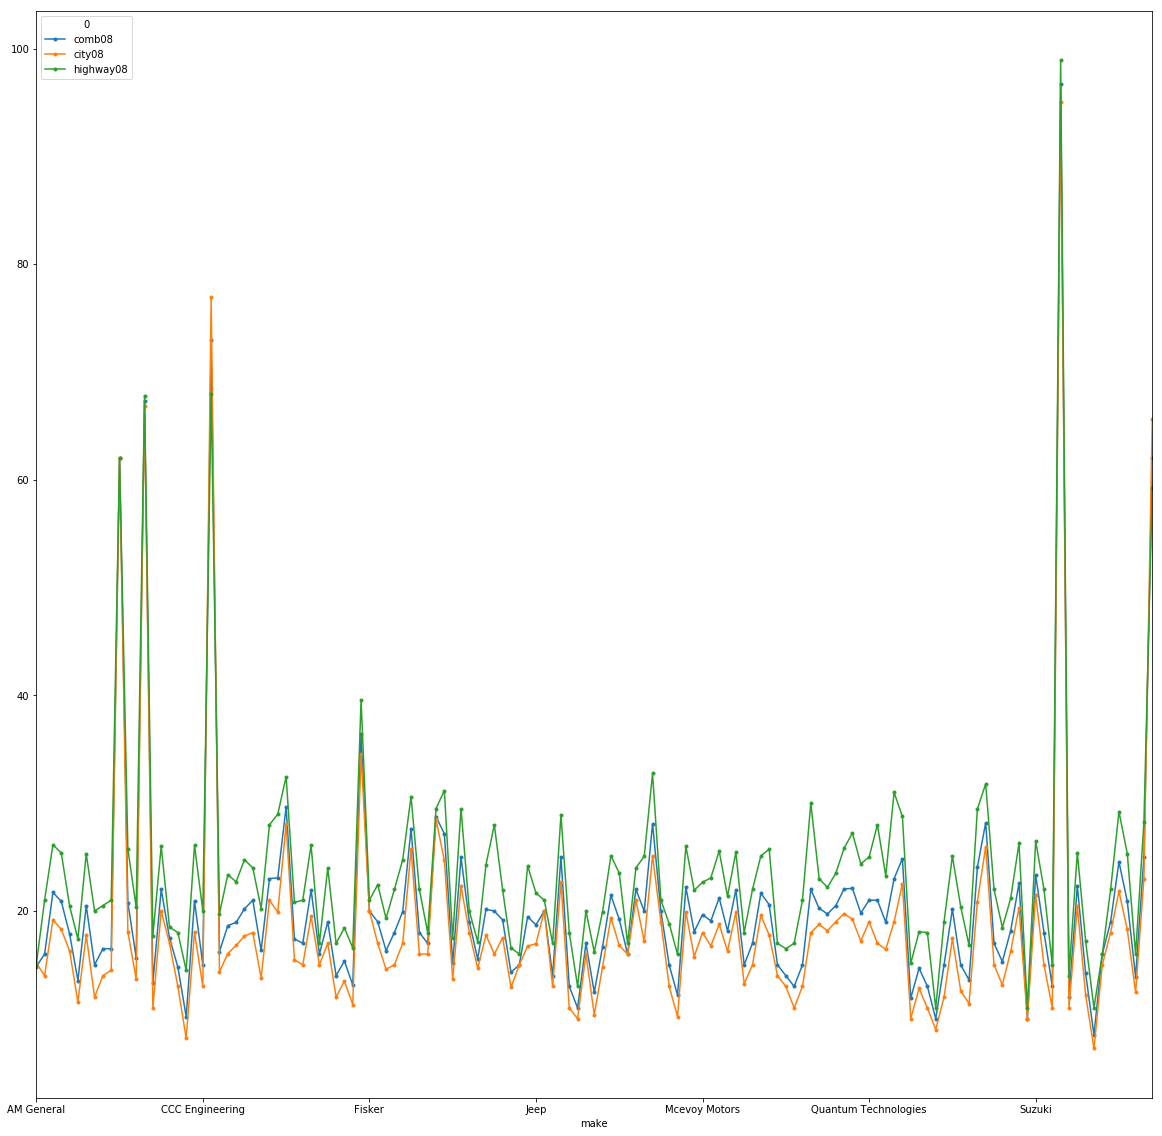

In [34]:
## plotting 
res.plot(figsize=(20,20), style='.-')

## Overall: Tesla produces most effcicient fleet of cars

In [35]:
## maximum combination of highway and city make name overall 
a = pd.DataFrame(res.nlargest(1,'comb08'))

In [36]:
## maximum mpg in city make name overall
b= pd.DataFrame(res.nlargest(1,'city08'))

In [37]:
## maximum mpg on highway make name overall
c= pd.DataFrame(res.nlargest(1,'highway08'))

In [38]:
result = pd.concat([a,b,c])

In [39]:
result

,comb08,city08,highway08
make,,,
Tesla,96.741379,95.086207,98.965517
Tesla,96.741379,95.086207,98.965517
Tesla,96.741379,95.086207,98.965517


## See the change in fuel efficiency over the years

In [40]:
df = new_data[['barrels08','barrelsA08','charge120','charge240','city08','cityA08','year','phevCity','phevHwy','phevComb','fuelType','fuelCost08','fuelCostA08','comb08','combA08','highway08','highwayA08','make','fuelType1']]

In [41]:
df.head()

,barrels08,barrelsA08,charge120,charge240,city08,cityA08,year,phevCity,phevHwy,phevComb,fuelType,fuelCost08,fuelCostA08,comb08,combA08,highway08,highwayA08,make,fuelType1
1,15.69571429,0,0,0,19,0,1985,0,0,0,Regular,1950,0,21,0,25,0,Alfa Romeo,Regular Gasoline
2,29.96454545,0,0,0,9,0,1985,0,0,0,Regular,3700,0,11,0,14,0,Ferrari,Regular Gasoline
3,12.20777778,0,0,0,23,0,1985,0,0,0,Regular,1500,0,27,0,33,0,Dodge,Regular Gasoline
4,29.96454545,0,0,0,10,0,1985,0,0,0,Regular,3700,0,11,0,12,0,Dodge,Regular Gasoline
5,17.34789474,0,0,0,17,0,1993,0,0,0,Premium,2700,0,19,0,23,0,Subaru,Premium Gasoline


In [42]:
## converting the type of the column to numeric
df['comb08'] = pd.to_numeric(df['comb08'], errors='coerce')
df['city08'] = pd.to_numeric(df['city08'], errors='coerce')
df['highway08'] = pd.to_numeric(df['highway08'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['make'] = pd.to_numeric(df['make'], errors='coerce')

In [43]:
## specifying the plot type for all plots
plt.style.use('ggplot')

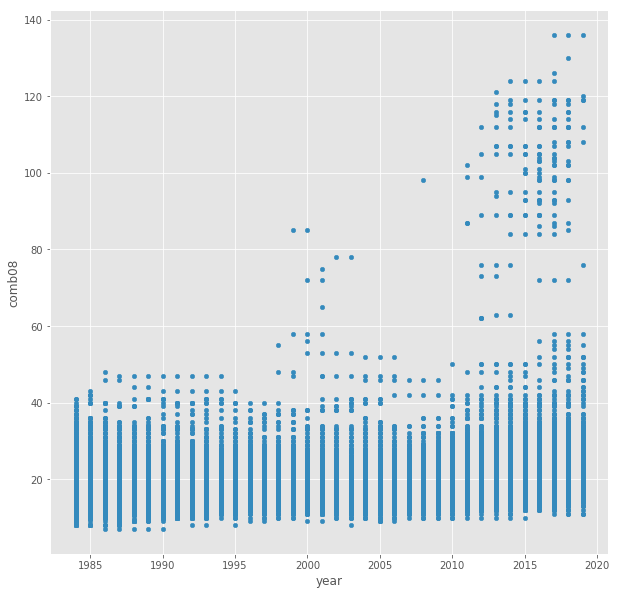

In [44]:
## to see the pattern of mpg over the years. From here we can see that the mpg is increasing over the years. Hence, fuel economy 
## is improving over the years
ax1 = df.plot.scatter(x='year',y='comb08',figsize=(10,10))

In [45]:
new_df = df[['comb08','year','fuelType1']]

In [46]:
new_df['comb08'] = pd.to_numeric(new_df['comb08'], errors='coerce')
new_df['year'] = pd.to_numeric(new_df['year'], errors='coerce')

In [47]:
# groupby year and fueltype1
grouped_df = new_df.groupby(['year','fuelType1']).mean()

In [48]:
grouped_df.reset_index()

,year,fuelType1,comb08
0,1984,Diesel,24.820611
1,1984,Regular Gasoline,19.121622
2,1985,Diesel,23.848101
3,1985,Premium Gasoline,19.554455
4,1985,Regular Gasoline,19.383495
5,1986,Diesel,23.239437
6,1986,Premium Gasoline,18.960000
7,1986,Regular Gasoline,19.345865
8,1987,Diesel,20.589286
9,1987,Premium Gasoline,18.853933


In [49]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 155 entries, (1984, Diesel) to (2019, Regular Gasoline)
Data columns (total 1 columns):
comb08    155 non-null float64
dtypes: float64(1)
memory usage: 2.0+ KB


In [50]:
## to see mpg of various fuel type over the years
new_df = grouped_df['comb08'].unstack()

In [51]:
new_df

fuelType1,Diesel,Electricity,Midgrade Gasoline,Natural Gas,Premium Gasoline,Regular Gasoline
year,,,,,,
1984,24.820611,NaN,NaN,NaN,NaN,19.121622
1985,23.848101,NaN,NaN,NaN,19.554455,19.383495
1986,23.239437,NaN,NaN,NaN,18.960000,19.345865
1987,20.589286,NaN,NaN,NaN,18.853933,19.189655
1988,17.935484,NaN,NaN,NaN,18.201923,19.489447
1989,18.575758,NaN,NaN,NaN,17.852113,19.329243
1990,17.896552,NaN,NaN,NaN,17.445312,19.251900
1991,18.487179,NaN,NaN,NaN,17.297980,19.178771
1992,18.913043,NaN,NaN,NaN,17.208145,19.278221


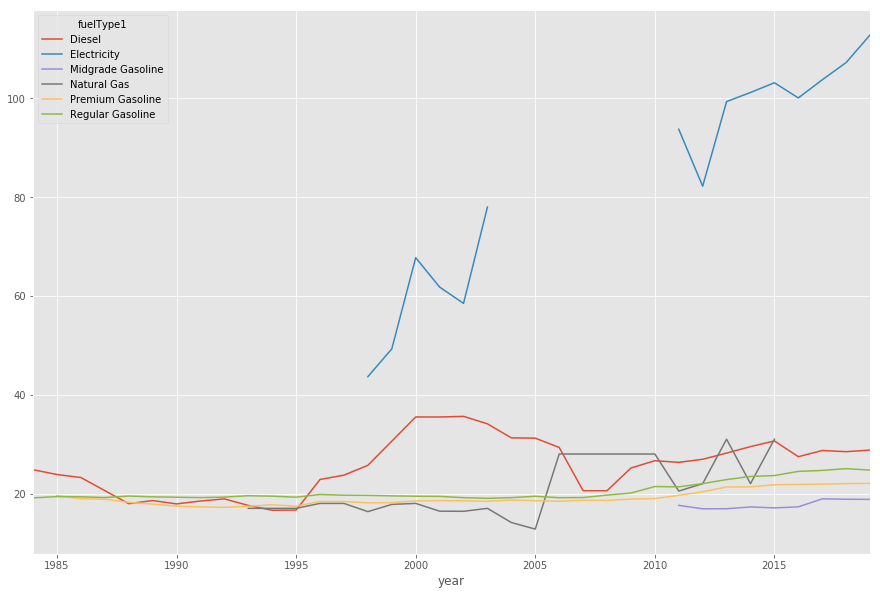

In [52]:
fig, ax = plt.subplots(figsize=(15,10))
new_df.plot(ax=ax)

In [53]:
int_data_new = new_data

## Question 1 part 3. Cleaning the dataset for predictive modeling

In [54]:
## finding null data for barrel08
nulldata = int_data_new['barrels08'].isnull()

In [55]:
## finding all columns cotaining null data
int_data_new.columns[int_data_new.isnull().any()].tolist()

['cylinders',
 'displ',
 'drive',
 'eng_dscr',
 'trany',
 'guzzler',
 'trans_dscr',
 'tCharger',
 'sCharger',
 'atvType',
 'fuelType2',
 'rangeA',
 'evMotor',
 'mfrCode',
 'c240Dscr',
 'c240bDscr',
 'startStop']

In [56]:
## Since all electric vehicles have no cylinders, replace null values with 0
int_data_new['cylinders'].fillna(0, inplace=True)

In [57]:
## converting data to numeric to find the mean of the data
int_data_new['displ'] = pd.to_numeric(int_data_new['displ'], errors='coerce')

In [58]:
## fill all the null cylinder type by the mean value
int_data_new['displ'].fillna(int_data_new['displ'].mean(), inplace=True)

In [59]:
## Count of unique drive within the column
int_data_new['drive'].value_counts()

Front-Wheel Drive             14105
Rear-Wheel Drive              13710
4-Wheel or All-Wheel Drive     6648
All-Wheel Drive                2868
4-Wheel Drive                  1415
2-Wheel Drive                   507
Part-time 4-Wheel Drive         248
Automatic (A1)                    1
Name: drive, dtype: int64

In [60]:
#the most common is front wheel drive for regular gasoline. Hence, replace missing data with front wheel drive 
int_data_new["drive"].fillna("Front-Wheel Drive", inplace = True) 

In [61]:
## grab the first letter to see if car is manual or automatic
int_data_new['trany'] = int_data_new['trany'].str[0]

In [62]:
##count of numbe rof manual and automatic cars
int_data_new['trany'].value_counts()

A    27916
M    12764
Name: trany, dtype: int64

In [63]:
## counting number of null values in trany
len(int_data_new) - int_data_new['trany'].count()

11

In [64]:
## since only 11 rows did not have values for Electric cars, it is best to delete the rows with no value of trany
drop_df = int_data_new.dropna(axis=0, subset=['trany'])

In [90]:
columns = ['guzzler','tCharger','sCharger','atvType','fuelType2','evMotor','mfrCode','trans_dscr','startStop','eng_dscr']

In [91]:
# convert all columns to str type
drop_df[columns] = drop_df[columns].astype(str)

In [92]:
## replace all null values in a column of str type with empty string
drop_df[columns].fillna(' ', inplace=True)

In [93]:
drop_df

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
1,15.69571429,0,0,0,19,0,0,0,0,0,...,,0,0,0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
2,29.96454545,0,0,0,9,0,0,0,0,0,...,,0,0,0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
3,12.20777778,0,0,0,23,0,0,0,0,0,...,,0,0,0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
4,29.96454545,0,0,0,10,0,0,0,0,0,...,,0,0,0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
5,17.34789474,0,0,0,17,0,0,0,0,0,...,,0,0,0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
6,14.98227273,0,0,0,21,0,0,0,0,0,...,,0,0,0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
7,13.1844,0,0,0,22,0,0,0,0,0,...,,0,0,0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
8,13.73375,0,0,0,23,0,0,0,0,0,...,,0,0,0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
9,12.67730769,0,0,0,23,0,0,0,0,0,...,,0,0,0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
10,13.1844,0,0,0,23,0,0,0,0,0,...,,0,0,0,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0


In [94]:
## setting all values to blank string for string values and 0 for all the numeric values
##so that easier to eliminate when modelling
drop_df['rangeA'].fillna(0, inplace=True)
drop_df['c240bDscr'].fillna(0, inplace=True)

In [95]:
drop_df.columns[drop_df.isnull().any()].tolist()

[]

In [72]:
drop_df

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
1,15.69571429,0,0,0,19,0,0,0,0,0,...,,0,0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
2,29.96454545,0,0,0,9,0,0,0,0,0,...,,0,0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
3,12.20777778,0,0,0,23,0,0,0,0,0,...,,0,0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
4,29.96454545,0,0,0,10,0,0,0,0,0,...,,0,0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
5,17.34789474,0,0,0,17,0,0,0,0,0,...,,0,0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
6,14.98227273,0,0,0,21,0,0,0,0,0,...,,0,0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
7,13.1844,0,0,0,22,0,0,0,0,0,...,,0,0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
8,13.73375,0,0,0,23,0,0,0,0,0,...,,0,0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
9,12.67730769,0,0,0,23,0,0,0,0,0,...,,0,0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0
10,13.1844,0,0,0,23,0,0,0,0,0,...,,0,0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,,0,0,0


In [77]:
## create dummy variables for transmission for A = Automatic and M= Manual
dummy_df = pd.get_dummies(drop_df, prefix=['trany'], columns=['trany'])

In [78]:
## create dummies for type of fuel
dummies_df = pd.get_dummies(dummy_df, prefix=['fuelType1'], columns=['fuelType1'])

## Thank you!